# Pagerank Assignment
---

The goal of this exercise is to experiment on the Pagerank problem by utilizing the power method.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse
import matplotlib.pyplot as plt
from scipy.sparse import SparseEfficiencyWarning

warnings.simplefilter('ignore', SparseEfficiencyWarning)

## Data Preprocessing
---

We will start by creating the transition matrix of our problem. Its shape would be square and its dimensions are directly connected to the number of unique nodes. Given the large number of nodes, we will store the transition matrix in a sparse format:

In [2]:
# load data
df = pd.read_csv('stanweb.dat', sep='\s+', names=['source', 'dest', 'value'])

# creation of transition matrix
data = np.array(df) # convert to numpy array
n = np.max(df['source']) # calculate dimensions of transition matrix
P_trans = sparse.csr_matrix((data[:, 2], (data[:, 0]-1, data[:, 1]-1)), shape = (n, n))
P_trans.shape

(281903, 281903)

## 1a. Power Method with a=0.85
---

In [3]:
alpha = 0.85

it = 1
tol = 1e-8
error = 42

v = sparse.csr_matrix(np.ones(shape = (n, 1)) / n)
x_0 = sparse.csr_matrix(np.ones(shape = (n, 1)) / n)
a = np.asarray((np.sum(P_trans, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
print('Number of iterations: {}'.format(it))
print('Nodes with the 10 largest eignevalues:', end=" ")
for i in range(1, 10):
    print(np.argsort(-x.toarray())[0][i-1], end=" ")

Number of iterations: 96
Nodes with the 10 largest eignevalues: 89072 226410 241453 262859 134831 234703 136820 68888 105606 

We notice how the power method for `alpha=0.85` lasted **96** iterations.

In [4]:
# accumulator initialization for question 1c
acc = {}
for i in range(1, 11):
    acc[-i] = np.argsort(-x.toarray())[0][-i]
    acc[i-1] = np.argsort(-x.toarray())[0][i-1]

## 1b. Power Method with a=0.99
---

In [5]:
alpha = 0.99

it = 1
tol = 1e-8
error = 42

v = sparse.csr_matrix(np.ones(shape = (n, 1)) / n)
x_0 = sparse.csr_matrix(np.ones(shape = (n, 1)) / n)
a = np.asarray((np.sum(P_trans, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
print('Number of iterations: {}'.format(it))
print('Nodes with the 10 largest eignevalues:', end=" ")
for i in range(10):
    print(np.argsort(-x.toarray())[0][i], end=" ")

Number of iterations: 1513
Nodes with the 10 largest eignevalues: 89072 281771 174664 226410 179644 271408 262859 136820 68888 77987 

We notice how for `alpha=0.99` the power method lasted **1513** iterations, nearly 15 times as much than the previous section. It is also worth noting, that even though the node that corresponds to the larger eigenvalue remains the same for the different alphas, the rest are not 100% the same. Reason suggests, that the larger number of iterations enabled a solution of a more stable state that the one of the previous section.

## 1c. Speed of covergence for more / less important eigenvalues
---

At this section we will experiment on how fast components of difference importance converge. We will set our to `alpha=0.85`:

In [6]:
alpha = 0.85

it = 1
tol = 1e-8
error = 42

sonqo = [[] for i in range(20)]

v = sparse.csr_matrix(np.ones(shape = (n, 1)) / n)
x_0 = sparse.csr_matrix(np.ones(shape = (n, 1)) / n)
a = np.asarray((np.sum(P_trans, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
    for i in range(1, 11):
        if np.argsort(-x.toarray())[0][-i] == acc[-i]:
            sonqo[-i].append(1)
        else:
            sonqo[-i].append(0)
        if np.argsort(-x.toarray())[0][i-1] == acc[i-1]:
            sonqo[i-1].append(1)
        else:
            sonqo[i-1].append(0)

Visualizing the results we get:

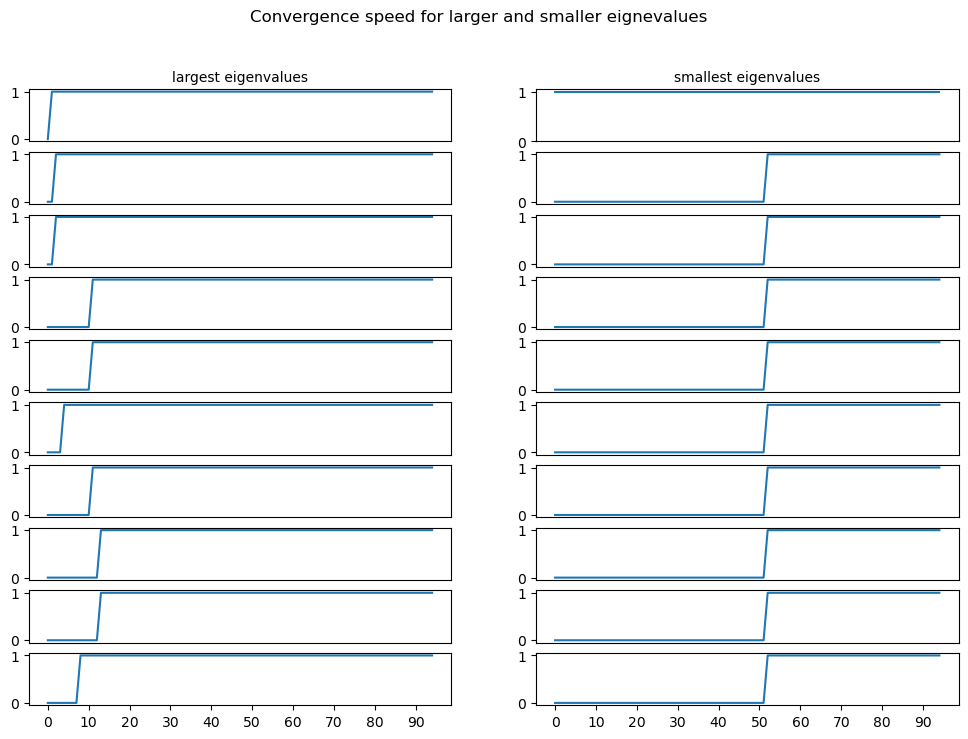

In [7]:
fig, axes = plt.subplots(10, 2, figsize=(12, 8))
fig.suptitle('Convergence speed for larger and smaller eignevalues')

# plotting top-10 eigenvalues
eig = 0
for i in range(10):
    sns.lineplot(x=[j for j in range(95)], y=sonqo[eig], ax=axes[i, 0])
    axes[i, 0].set_yticks([0, 1])
    axes[i, 0].set_xticks([])
    eig += 1
    
# plotting bottom-10 eigenvalues
eig = -1
for i in range(10):
    sns.lineplot(x=[j for j in range(95)], y=sonqo[eig], ax=axes[i, 1])
    axes[i, 1].set_yticks([0, 1])
    axes[i, 1].set_xticks([])
    eig -= 1
    
axes[0, 0].set_title('largest eigenvalues', fontsize=10)
axes[0, 1].set_title('smallest eigenvalues', fontsize=10)

axes[9, 0].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
axes[9, 1].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

plt.show()

We notice how the eigenvalues that correspond to the most important nodes tend to converge faster than the less important ones. However, it is worth noting that the smallest eigenvalue converged from the first iteration, possibly indicating very few, if any, connections on the transition matrix.

## 2a. Creation of page X
---

We will create a new page `X` with not in- or out-links and see how it ranks into our dataset:

In [8]:
# initialize page X and alter transition matrix
X = np.array([np.max(data[:, 0])+1, np.max(data[:, 0])+1, 1]) # X links to itself
data_X = np.vstack((data, X)) # combine with previous
P_trans_X = sparse.csr_matrix((data_X[:, 2], (data_X[:, 0]-1, data_X[:, 1]-1)), shape = (n+1, n+1))
P_trans_X.shape

(281904, 281904)

In [9]:
alpha = 0.85

it = 1
tol = 1e-8
error = 42

v = sparse.csr_matrix(np.ones(shape = (n+1, 1)) / (n+1))
x_0 = sparse.csr_matrix(np.ones(shape = (n+1, 1)) / (n+1))
a = np.asarray((np.sum(P_trans_X, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans_X) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
print('Number of iterations: {}'.format(it))
print('Nodes with the 10 largest eignevalues:', end=" ")
for i in range(1, 10):
    print(np.argsort(-x.toarray())[0][i-1], end=" ")

Number of iterations: 96
Nodes with the 10 largest eignevalues: 89072 226410 241453 262859 134831 234703 136820 68888 105606 

In [10]:
print('Rank of added page: {}'.format(np.argsort(-x.toarray()).tolist()[0].index(281903)))

Rank of added page: 48383


## 2b. Creation of page Y
---

Aiming to improve the ranking of our page `X` we add another page `Y` only linking to `X`:

In [11]:
# initialize page Y and alter transition matrix
Y = np.array([np.max(data_X[:, 0])+1, np.max(data_X[:, 0]), 1]) # Y links to X
data_Y = np.vstack((data_X, Y)) # combine with previous
P_trans_Y = sparse.csr_matrix((data_Y[:, 2], (data_Y[:, 0]-1, data_Y[:, 1]-1)), shape = (n+2, n+2))
P_trans_Y.shape

(281905, 281905)

In [12]:
alpha = 0.85

it = 1
tol = 1e-8
error = 42

v = sparse.csr_matrix(np.ones(shape = (n+2, 1)) / (n+2))
x_0 = sparse.csr_matrix(np.ones(shape = (n+2, 1)) / (n+2))
a = np.asarray((np.sum(P_trans_Y, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans_Y) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
print('Number of iterations: {}'.format(it))
print('Nodes with the 10 largest eignevalues:', end=" ")
for i in range(1, 10):
    print(np.argsort(-x.toarray())[0][i-1], end=" ")

Number of iterations: 96
Nodes with the 10 largest eignevalues: 89072 226410 241453 262859 134831 234703 136820 68888 105606 

In [13]:
print('Rank of added page: {}'.format(np.argsort(-x.toarray()).tolist()[0].index(281903)))

Rank of added page: 16180


We can see that the ranking of our page significantly improves.

## 2c. Creation of page Z
---

In order to further improve our ranking, we will add a third page `Z` which will also link to `X`:

In [15]:
# initialize page Z and alter transition matrix
Z = np.array([np.max(data_Y[:, 0])+1, np.max(data_Y[:, 0])-1, 1]) # Z links to X
data_Z = np.vstack((data_Y, Z))
P_trans_Z = sparse.csr_matrix((data_Z[:, 2], (data_Z[:, 0]-1, data_Z[:, 1]-1)), shape = (n+3, n+3))
P_trans_Z.shape

(281906, 281906)

In [16]:
alpha = 0.85

it = 1
tol = 1e-8
error = 42

v = sparse.csr_matrix(np.ones(shape = (n+3, 1)) / (n+3))
x_0 = sparse.csr_matrix(np.ones(shape = (n+3, 1)) / (n+3))
a = np.asarray((np.sum(P_trans_Z, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans_Z) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
print('Number of iterations: {}'.format(it))
print('Nodes with the 10 largest eignevalues:', end=" ")
for i in range(1, 10):
    print(np.argsort(-x.toarray())[0][i-1], end=" ")

Number of iterations: 96
Nodes with the 10 largest eignevalues: 89072 226410 241453 262859 134831 234703 136820 68888 105606 

In [17]:
print('Rank of added page: {}'.format(np.argsort(-x.toarray()).tolist()[0].index(281903)))

Rank of added page: 11114


We can see that the ranking of our page, again, significantly improves. It is worth mentioning that we also tried linking `Z` to both `X` and `Y` with varying propabilities, but the approach followed above maximized the ranking for our page.

## 2d. Creation of page W
---

We will now alter our page `X` and switch its internal linking to the top-5 popular pages:

In [18]:
# our page X correspond to node 281903!
P_trans_Z[281903, 281903] = 0
for page in [89072, 226410, 241453, 262859, 134831]:
    P_trans_Z[281903, page-1] = 0.20
P_trans_Z.shape

(281906, 281906)

In [19]:
alpha = 0.85

it = 1
tol = 1e-8
error = 42

v = sparse.csr_matrix(np.ones(shape = (n+3, 1)) / (n+3))
x_0 = sparse.csr_matrix(np.ones(shape = (n+3, 1)) / (n+3))
a = np.asarray((np.sum(P_trans_Z, axis = 1)[:, 0] == 0))

while error > tol:

    x = (alpha * x_0.T).dot(P_trans_Z) + ((alpha * x_0.T).dot(a) + (1 - alpha))[0, 0] * v.T
    
    error = np.linalg.norm((x.T - x_0).toarray()) / np.linalg.norm(x.T.toarray())
    
    x_0 = x.T.copy()
    
    it += 1
    
print('Number of iterations: {}'.format(it))
print('Nodes with the 10 largest eignevalues:', end=" ")
for i in range(1, 10):
    print(np.argsort(-x.toarray())[0][i-1], end=" ")

Number of iterations: 96
Nodes with the 10 largest eignevalues: 89072 226410 241453 262859 134831 234703 136820 68888 105606 

In [20]:
print('Rank of added page: {}'.format(np.argsort(-x.toarray()).tolist()[0].index(281903)))

Rank of added page: 109087


We can see how adding links from our page to the most important pages of our dataset worsened our ranking.

## 2e. Further improving our rank
---

Summarizing our findings we conclude that:

- adding more links to our page improves its ranking 
- creating external links from it to any other page, regardless of their importance, drops its ranking

Taking the above due consideration, the best way to improve the ranking of our page would be to add external links from the most important pages to our page `X`. Should we do this consistently to the descending ranking list, we can force our page to reach the top places.